In [63]:
import numpy as np
import imageio
import random
import os
import matplotlib.pyplot as plt
import glob
import networkx as nx

In [64]:
class randomWalk():
    '''
    Class to generate random walk on the lattice and save agent's path as a video.
    '''
    
    def __init__(self, latticeSize = 20, planeSizeX = 20, planeSizeY = 20):
        '''
        Initializes the lattice and the agent.
        
        Parameters:
        latticeSize - size of the square lattice, the default is 20
        planeSizeX - horizontal size of the plane, the default is 20
        planeSizeY - vertical size of the plane, the default is 20
        '''
        
        self.timeSteps = None
        self.latticeSize = latticeSize
        self.planeSizeX = planeSizeX
        self.planeSizeY = planeSizeY
        self.moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        
        if not os.path.exists('lattice'):
            os.makedirs('lattice')
        if not os.path.exists('plane'):
            os.makedirs('plane')
        if not os.path.exists('graph'):
            os.makedirs('graph')
        
        
        
    def latticeARW(self, timeSteps = 100, showTraj = False, toVideo = False):
        '''
        Iterates over every step and generates random walk of the agent and saves results as png file.

        Parameters:
        timeSteps - number of steps done by the agent, the default is 100
        showTraj - decides if the trajectory is plotted after executing code, the default is False
        toVideo - decides if snapshots of every step have to be saved to a folder, the default is False
        '''
        files = glob.glob(os.path.join('lattice', '*')) # get access to all files in a folder
        for f in files:
            os.remove(f) # remove all files from folder before adding new ones
        
        self.timeSteps = timeSteps

        x = np.zeros(timeSteps + 1)
        y = np.zeros(timeSteps + 1)

        plt.rcParams['figure.figsize'] = [6, 6]
        plt.xlim(-self.latticeSize/2, self.latticeSize/2)
        plt.ylim(-self.latticeSize/2, self.latticeSize/2)
        plt.title("Agent's random walk on a square lattice")

        for t in range(timeSteps):
            nextMove = random.choice(self.moves)
            while abs(x[t] + nextMove[0]) > self.latticeSize/2 or abs(y[t] + nextMove[1]) > self.latticeSize/2:
                nextMove = random.choice(self.moves)
            x[t + 1] = x[t] + nextMove[0]
            y[t + 1] = y[t] + nextMove[1]
            
            #if toVideo == True:
            #    file = os.path.join('lattice', f'move_{t}.png')
                
            if t == 0:
                plt.scatter(x[t], y[t], s = 30, c = 'green')
            if t == timeSteps - 1:
                plt.scatter(x[t], y[t], s = 30, c = 'red')
            plt.scatter(x[t], y[t], s = 3, c = 'gray')
            plt.plot(x[:t+2], y[:t+2], c = 'black', ls = '--', lw = 0.8)
            
            if toVideo == True:
                file = os.path.join('lattice', f'move_{t}.png')
                plt.savefig(file, dpi = 100)
            
        if showTraj == True:
            plt.show()
        else:
            plt.close()

            
            
    def planeARW(self, timeSteps = 100, showTraj = False, toVideo = False):
        '''
        Iterates over every step and generates random walk of the agent on the plane with randomly chosen angles
        and saves results as png file. Also returns A - the fraction of time steps when the walker is in right half
        plane (x > 0) and B -  the fraction of time the walker is in the first quadrant (x > 0, y > 0).
        
        Parameters:
        timeSteps - number of steps done by the agent, the default is 100
        showTraj - decides if the trajectory is plotted after executing code, the default is False
        toVideo - decides if snapshots of every step have to be saved to a folder, the default is False
        '''
        files = glob.glob(os.path.join('plane', '*')) # get access to all files in a folder
        for f in files:
            os.remove(f) # remove all files from folder before adding new ones
        
        self.timeSteps = timeSteps
        
        x = np.zeros(timeSteps + 1)
        y = np.zeros(timeSteps + 1)
        
        probA = 0
        probB = 0
        
        plt.rcParams['figure.figsize'] = [6, 6]
        plt.xlim(-self.planeSizeX/2, self.planeSizeX/2)
        plt.ylim(-self.planeSizeY/2, self.planeSizeY/2)
        plt.title("Agent's random walk on a plane")
        
        for t in range(timeSteps):
            angle = np.random.uniform(0, 2 * np.pi)
            while abs(x[t] + np.cos(angle)) > self.planeSizeX/2 or abs(y[t] + np.sin(angle)) > self.planeSizeY/2:
                angle = np.random.uniform(0, 2 * np.pi)
            x[t + 1] = x[t] + np.cos(angle)
            y[t + 1] = y[t] + np.sin(angle)
            
            if x[t] > 0:
                probA += 1
            if x[t] > 0 and y[t] > 0:
                probB += 1
                
            if t == 0:
                plt.scatter(x[t], y[t], s = 30, c = 'green')
            if t == timeSteps - 1:
                plt.scatter(x[t], y[t], s = 30, c = 'red') 
            plt.scatter(x[t], y[t], s = 3, c = 'gray')
            plt.plot(x[:t+2], y[:t+2], c = 'black', ls = '--', lw = 0.5)
            plt.axvline(x = 0, c = 'gray', ls = ':', lw = 0.5)
            plt.axhline(y = 0, c = 'gray', ls = ':', lw = 0.5)
            
            if toVideo == True:
                file = os.path.join('plane', f'move_{t}.png')
                plt.savefig(file, dpi = 100)
            
        if showTraj == True:
            plt.show()
        else:
            plt.close()
        
        return probA/self.timeSteps, probB/self.timeSteps
    
    
    
    def graphARW(self, graphType, timeSteps = 100, p = 0.1, N = 10, k = 2, m = 3, showTraj = False, toVideo = False):
        '''
        Creates a random walk on a chosen graph and calculates average hitting times from origin node to every node.
        Also saves results as png file.
        
        Parameters:
        graphType - type of graph to generate random walk, we can choose from:
        random, wattsStrogatz and barabasiAlbert
        timeSteps - number of steps done by the agent, the default is 100
        p - probability used to generate random and wattsStrogatz graph, the default is 0.1
        N - number of nodes, the default is 10
        k - the number of nearest neighbors to which each node is connected initially, the default is 2
        m - the number of edges to attach from a new node to existing nodes in the graph, the default is 3
        showTraj - decides if the trajectory is plotted after executing code, the default is False
        toVideo - decides if snapshots of every step have to be saved to a folder, the default is False
        '''

        if graphType == 'random':
            G = nx.Graph()

            random.seed(100)

            for i in range(N):
                G.add_node(i)

            for i in range(N):
                for j in range(N):
                    if i != j:
                        q = np.random.rand()
                        if q < p:
                            G.add_edge(i, j)
                            
            while not nx.is_connected(G):
                G = nx.Graph()

                random.seed(100)

                for i in range(N):
                    G.add_node(i)

                for i in range(N):
                    for j in range(N):
                        if i != j:
                            q = np.random.rand()
                            if q < p:
                                G.add_edge(i, j)

        elif graphType == 'wattsStrogatz':
            G = nx.watts_strogatz_graph(N, k, p)
            
            while not nx.is_connected(G):
                G = nx.watts_strogatz_graph(N, k, p)

        elif graphType == 'barabasiAlbert':
            G = nx.barabasi_albert_graph(N, m)
            
            while not nx.is_connected(G):
                G = nx.barabasi_albert_graph(N, m)

        files = glob.glob(os.path.join('graph', '*')) # get access to all files in a folder
        for f in files:
            os.remove(f) # remove all files from folder before adding new ones

        nodes = list(G.nodes())
        origin = nodes[0]
        walk = [origin]

        avgHittingTime = {}
        for i in nodes:
            avgHittingTime[i] = 0
        avgHittingTime[origin] = 0
        paths = {}
        for i in range(len(nodes)):
            paths[i] = []

        self.timeSteps = timeSteps

        for t in range(timeSteps):
            currentNode = walk[-1]
            neighbors = list(G.neighbors(currentNode))
            nextNode = random.choice(neighbors)
            walk.append(nextNode)

            # avg hitting time
            for i in range(len(nodes)):
                if i == origin:
                    continue
                elif i == nextNode and avgHittingTime[i] == 0:
                    avgHittingTime[i] = t + 1
                    break
                else:
                    path = False
                    for n in G.neighbors(i):
                        if n == nextNode:
                            path = True
                            break
                    if path:
                        for p in paths[i]:
                             # skips the paths that have not been reached yet
                            if len(p) > t or len(p) <= t:
                                continue
                            if p[t] == neighbor and avgHittingTime[i] == 0:
                                avgHittingTime[i] = t + 1
                                break

            pos = {}
            for i in range(N):
                pos[i] = [np.cos(2*np.pi*i/N), np.sin(2*np.pi*i/N)]

            node_colors = ['red' if node == currentNode else 'gray' for node in G.nodes()]     
            nx.draw(G, pos, node_color = node_colors, with_labels=True)
            
            if toVideo == True:
                file = os.path.join('graph', f'move_{t}.png')
                plt.savefig(file, dpi = 100)
            
        if showTraj == True:
                plt.show()
        else:
                plt.close()

        return avgHittingTime
    
    
    
    def createARWMovie(self, walkType, graphType = None, fps = 20):
        '''
        Creates a movie from saved images of a random walk of the agent.
        
        Parameters:
        walkType - type of walk which we want to create a move from, we can choose from
        lattice, plane, graph
        graphType - type of graph, we can choose from
        random, wattsStrogatz, barabasiAlbert
        fps - speed of the movie, the default is 20
        '''
        if walkType == 'lattice':
            filename = 'LatticeARW.mp4'
            folder = 'lattice'
        elif walkType == 'plane':
            filename = 'PlaneARW.mp4'
            folder = 'plane'
        elif walkType == 'graph':
            folder = 'graph'
            if graphType == 'random':
                filename = 'RandomGraphARW.mp4'
            elif graphType == 'wattsStrogatz':
                filename = 'WattsStrogatzGraphARW.mp4'
            elif graphType == 'barabasiAlbert':
                filename = 'BarabasiAlbertGraphARW.mp4'
            
        with imageio.get_writer(filename, mode = 'I', fps = fps) as w: # mode I means that function uses Images to create video
            for i in range(self.timeSteps):     
                file = os.path.join(folder, f'move_{i}.png')
                img = imageio.imread(file)
                w.append_data(img)

In [65]:
walk1 = randomWalk()
walk2 = randomWalk()
walk3 = randomWalk()
walk4 = randomWalk()
walk5 = randomWalk()

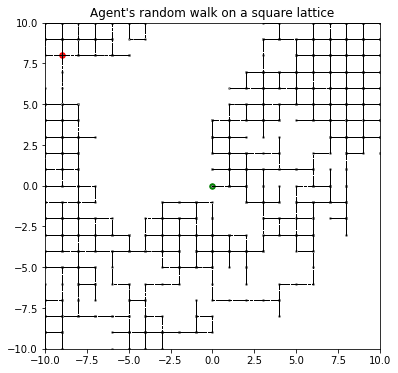

In [66]:
walk1.latticeARW(timeSteps = 1000, showTraj = True)

In [67]:
walk1.latticeARW(timeSteps = 100, toVideo = True)
walk1.createARWMovie('lattice')

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 600) to (608, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


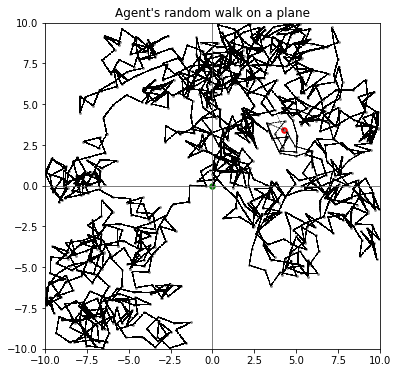

(0.547, 0.4)

In [68]:
walk2.planeARW(timeSteps = 1000, showTraj = True)

In [69]:
walk2.planeARW(timeSteps = 100, toVideo = True)
walk2.createARWMovie('plane')

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 600) to (608, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [70]:
walk3.graphARW('random', p = 0.6, timeSteps = 100, N = 20, toVideo = True)
walk3.createARWMovie('graph', 'random', fps = 5)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 600) to (608, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [71]:
walk4.graphARW('wattsStrogatz', p = 0.6, timeSteps = 100, N = 20, toVideo = True)
walk4.createARWMovie('graph', 'wattsStrogatz', fps = 5)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 600) to (608, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [72]:
walk5.graphARW('barabasiAlbert', timeSteps = 100, N = 20, toVideo = True)
walk5.createARWMovie('graph', 'barabasiAlbert', fps = 5)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 600) to (608, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [73]:
def probsPDFs(N, t):
    '''
    Function to calculate average fraction of time steps when the walker is in right half of plane (x > 0)
    and when the walker is in the first quadrant (x > 0, y > 0) for many trajectories.
    
    Parameters:
    N - number of trajectories,
    t - time steps fo every trajectory
    '''
    walk = randomWalk()
    probsA = []
    probsB = []
    for i in range(N):
        if i % 20 == 0:
            a, b = walk.planeARW(t, showTraj = True)
            probsA.append(a)
            probsB.append(b)
        else:
            a, b = walk.planeARW(t)
            probsA.append(a)
            probsB.append(b)
        
    plt.hist(probsA, bins = 'auto', density = True)
    plt.title("Histogram of probabilities that x > 0")
    plt.show()
    
    meanA = np.round(np.mean(probsA), 5)
    print(f'Probability that x > 0 is {meanA}')
    
    plt.hist(probsB, bins = 'auto', density = True)
    plt.title("Histogram of probabilities that x > 0 and y > 0")
    plt.show()
    
    meanB = np.round(np.mean(probsB), 5)
    print(f'Probability that x > 0 and y > 0 is {meanB}')

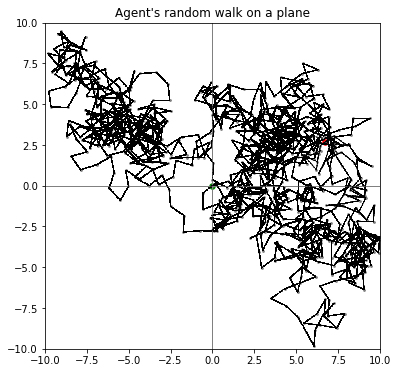

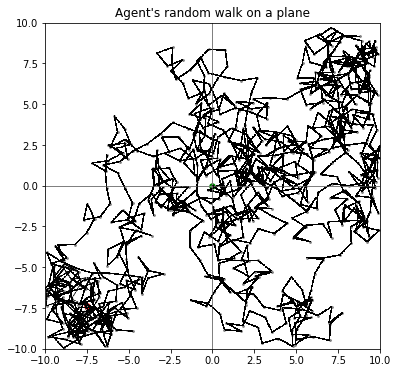

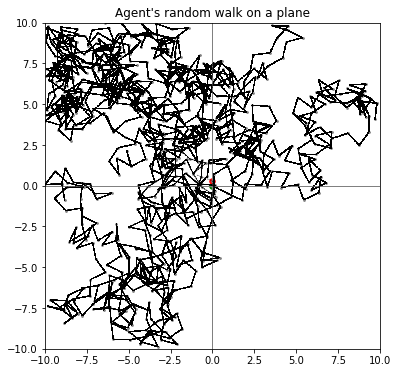

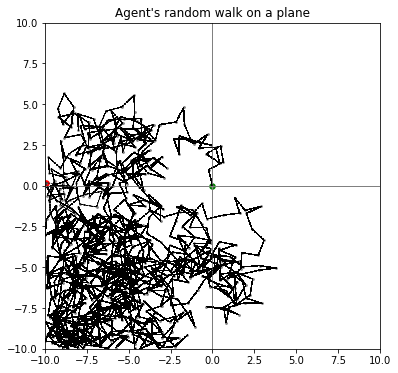

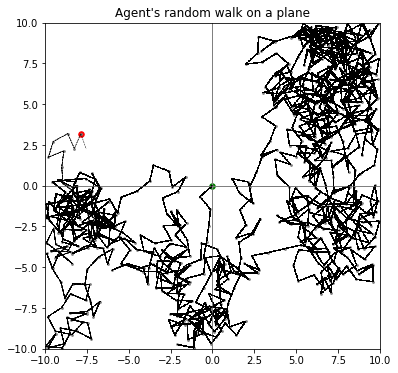

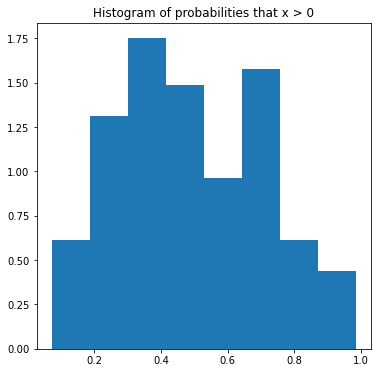

Probability that x > 0 is 0.4925


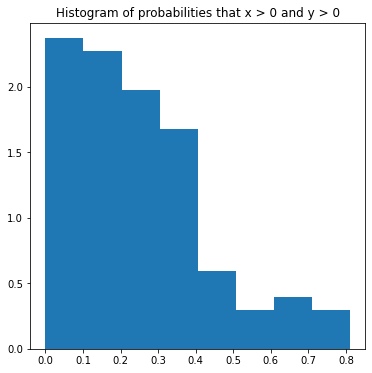

Probability that x > 0 and y > 0 is 0.2533


In [74]:
probsPDFs(100, 1000)

In [60]:
def averageHittingTimes(graphType, numTraj, timeSteps = 100, p = 0.1, N = 10, k = 2, m = 3):
    '''
    Calculates average hitting times from origin node to every node for many trajectories.
    
    Parameters:
    graphType - type of graph, we can choose from:
    random, wattsStrogatz, barabasiAlbert
    numTraj - number of trajectories
    timeSteps - number of steps in one trajectory, the default is 100
    p - probability used to generate random and wattsStrogatz graph, the default is 0.1
    N - number of nodes, the default is 10
    k - the number of nearest neighbors to which each node is connected initially, the default is 2
    m - the number of edges to attach from a new node to existing nodes in the graph, the default is 3
    '''
    walk = randomWalk()
    results = []
    for i in range(numTraj):
        res = walk.graphARW(graphType, p = p, timeSteps = timeSteps, N = N)
        results.append(res)

    for i in results:
        if type(i) is not dict:
            del results[results.index(i)]
    
    accumulatedValues = {}
    for i in results:
        for key, value in i.items():
            if key in accumulatedValues:
                accumulatedValues[key] += value
            else:
                accumulatedValues[key] = value
                
    avgHittingTimes = {}
    for key, value in accumulatedValues.items():
        avgHittingTimes[key] = value/len(results)
        
    return avgHittingTimes

In [26]:
averageHittingTimes('random', 100, p = 0.5, timeSteps = 200, N = 20)

{0: 0.0,
 1: 24.16,
 2: 24.1,
 3: 18.27,
 4: 18.24,
 5: 14.29,
 6: 15.82,
 7: 17.28,
 8: 17.45,
 9: 17.0,
 10: 21.46,
 11: 17.02,
 12: 22.09,
 13: 18.92,
 14: 18.88,
 15: 22.11,
 16: 21.03,
 17: 17.42,
 18: 17.37,
 19: 22.61}

In [61]:
averageHittingTimes('wattsStrogatz', 100, p = 0.5, timeSteps = 200, N = 20, k = 4)

{0: 0.0,
 1: 24.95,
 2: 39.66,
 3: 49.43,
 4: 54.18,
 5: 47.5,
 6: 53.31,
 7: 56.71,
 8: 45.85,
 9: 47.91,
 10: 53.29,
 11: 60.83,
 12: 61.95,
 13: 51.65,
 14: 64.81,
 15: 45.55,
 16: 48.98,
 17: 55.09,
 18: 46.66,
 19: 37.88}

In [62]:
averageHittingTimes('barabasiAlbert', 100, timeSteps = 200, N = 20)

{0: 0.0,
 1: 24.72,
 2: 25.31,
 3: 22.21,
 4: 13.22,
 5: 18.83,
 6: 15.06,
 7: 21.64,
 8: 22.53,
 9: 23.95,
 10: 24.74,
 11: 29.69,
 12: 27.08,
 13: 32.29,
 14: 30.21,
 15: 33.54,
 16: 30.86,
 17: 33.49,
 18: 31.01,
 19: 33.91}